In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('airlines.csv')

In [5]:
data.columns

Index(['Code', 'Name', 'TimeLabel', 'TimeMonth', 'TimeMonthName', 'TimeYear',
       'DelaysCarrier', 'DelaysLateAircraft', 'DelaysNationalAviationSystem',
       'DelaysSecurity', 'DelaysWeather', 'CarriersNames', 'CarriersTotal',
       'FlightsCancelled', 'FlightsDelayed', 'FlightsDiverted',
       'FlightsOnTime', 'FlightsTotal', 'Delayed.Carrier',
       'DelayedLateAircraft', 'DelayedNationalAviationSystem',
       'MinutesDelayedSecurity', 'MinutesDelayedTotal',
       'MinutesDelayedWeather'],
      dtype='object')

In [6]:
data.head()

,Code,Name,TimeLabel,TimeMonth,TimeMonthName,TimeYear,DelaysCarrier,DelaysLateAircraft,DelaysNationalAviationSystem,DelaysSecurity,...,FlightsDelayed,FlightsDiverted,FlightsOnTime,FlightsTotal,Delayed.Carrier,DelayedLateAircraft,DelayedNationalAviationSystem,MinutesDelayedSecurity,MinutesDelayedTotal,MinutesDelayedWeather
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,1009,1275,3217,17,...,5843,27,23974,30060,61606,68335,118831,518,268764,19474
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,374,495,685,3,...,1623,3,7875,9639,20319,28189,24400,99,77167,4160
2,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",2003/06,6,June,2003,296,477,389,8,...,1245,15,6998,8287,13635,26810,17556,278,64480,6201
3,CLT,"Charlotte, NC: Charlotte Douglas International",2003/06,6,June,2003,300,472,735,2,...,1562,14,7021,8670,14763,23379,23804,127,65865,3792
4,DCA,"Washington, DC: Ronald Reagan Washington National",2003/06,6,June,2003,283,268,487,4,...,1100,18,5321,6513,13775,13712,20999,120,52747,4141


In [7]:
data.dtypes

Code                             object
Name                             object
TimeLabel                        object
TimeMonth                         int64
TimeMonthName                    object
TimeYear                          int64
DelaysCarrier                     int64
DelaysLateAircraft                int64
DelaysNationalAviationSystem      int64
DelaysSecurity                    int64
DelaysWeather                     int64
CarriersNames                    object
CarriersTotal                     int64
FlightsCancelled                  int64
FlightsDelayed                    int64
FlightsDiverted                   int64
FlightsOnTime                     int64
FlightsTotal                      int64
Delayed.Carrier                   int64
DelayedLateAircraft               int64
DelayedNationalAviationSystem     int64
MinutesDelayedSecurity            int64
MinutesDelayedTotal               int64
MinutesDelayedWeather             int64
dtype: object

### 1. Quel sont les trois aéroports qui ont eu le plus de vol annulé?

In [8]:
data.groupby("Code").FlightsCancelled.sum().sort_values(ascending=False).head(3)

Code
ORD    144426
ATL     86176
DFW     80802
Name: FlightsCancelled, dtype: int64

In [9]:
plt.rcParams['figure.figsize'] = [15,6] # Taille du graphique en pouces
plt.rcParams['figure.dpi'] = 300 # DPI

#### Évolution des vols supprimés en fonction des années

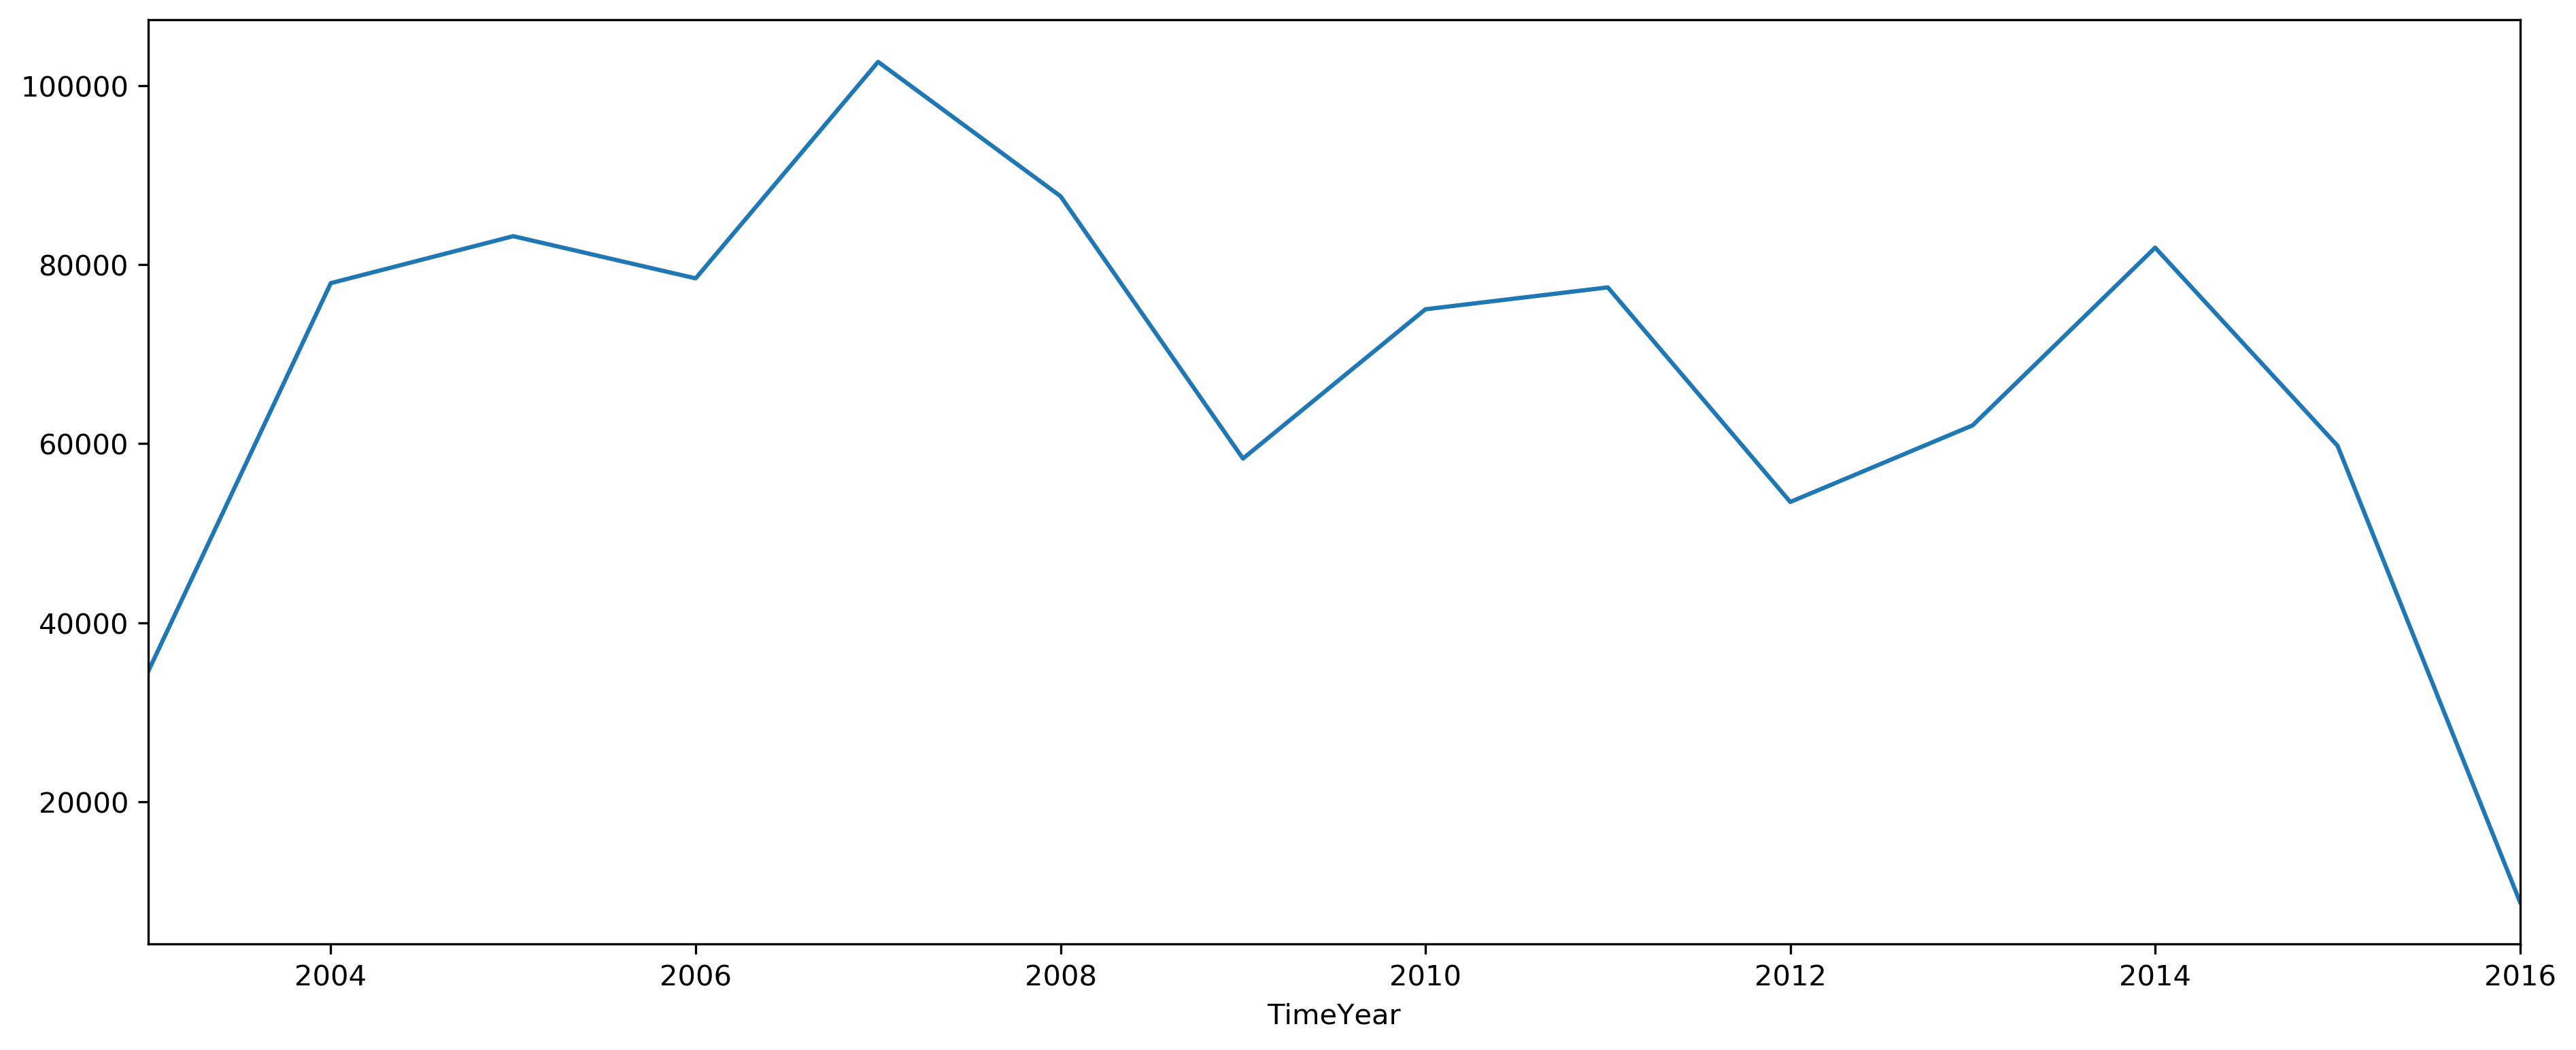

In [10]:
data.groupby("TimeYear").FlightsCancelled.sum().plot()

### 2. Quel est  l'aéroport ayant le plus grand nombre d'avions retardés dans un mois?

In [11]:
data[data.DelaysLateAircraft == data.DelaysLateAircraft.max()][['Name','TimeMonth','TimeYear','DelaysLateAircraft']]

,Name,TimeMonth,TimeYear,DelaysLateAircraft
1914,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",12,2008,4483


#### Évolution des retards au fil des années pour l'aéroport avec le plus de retard sur un mois

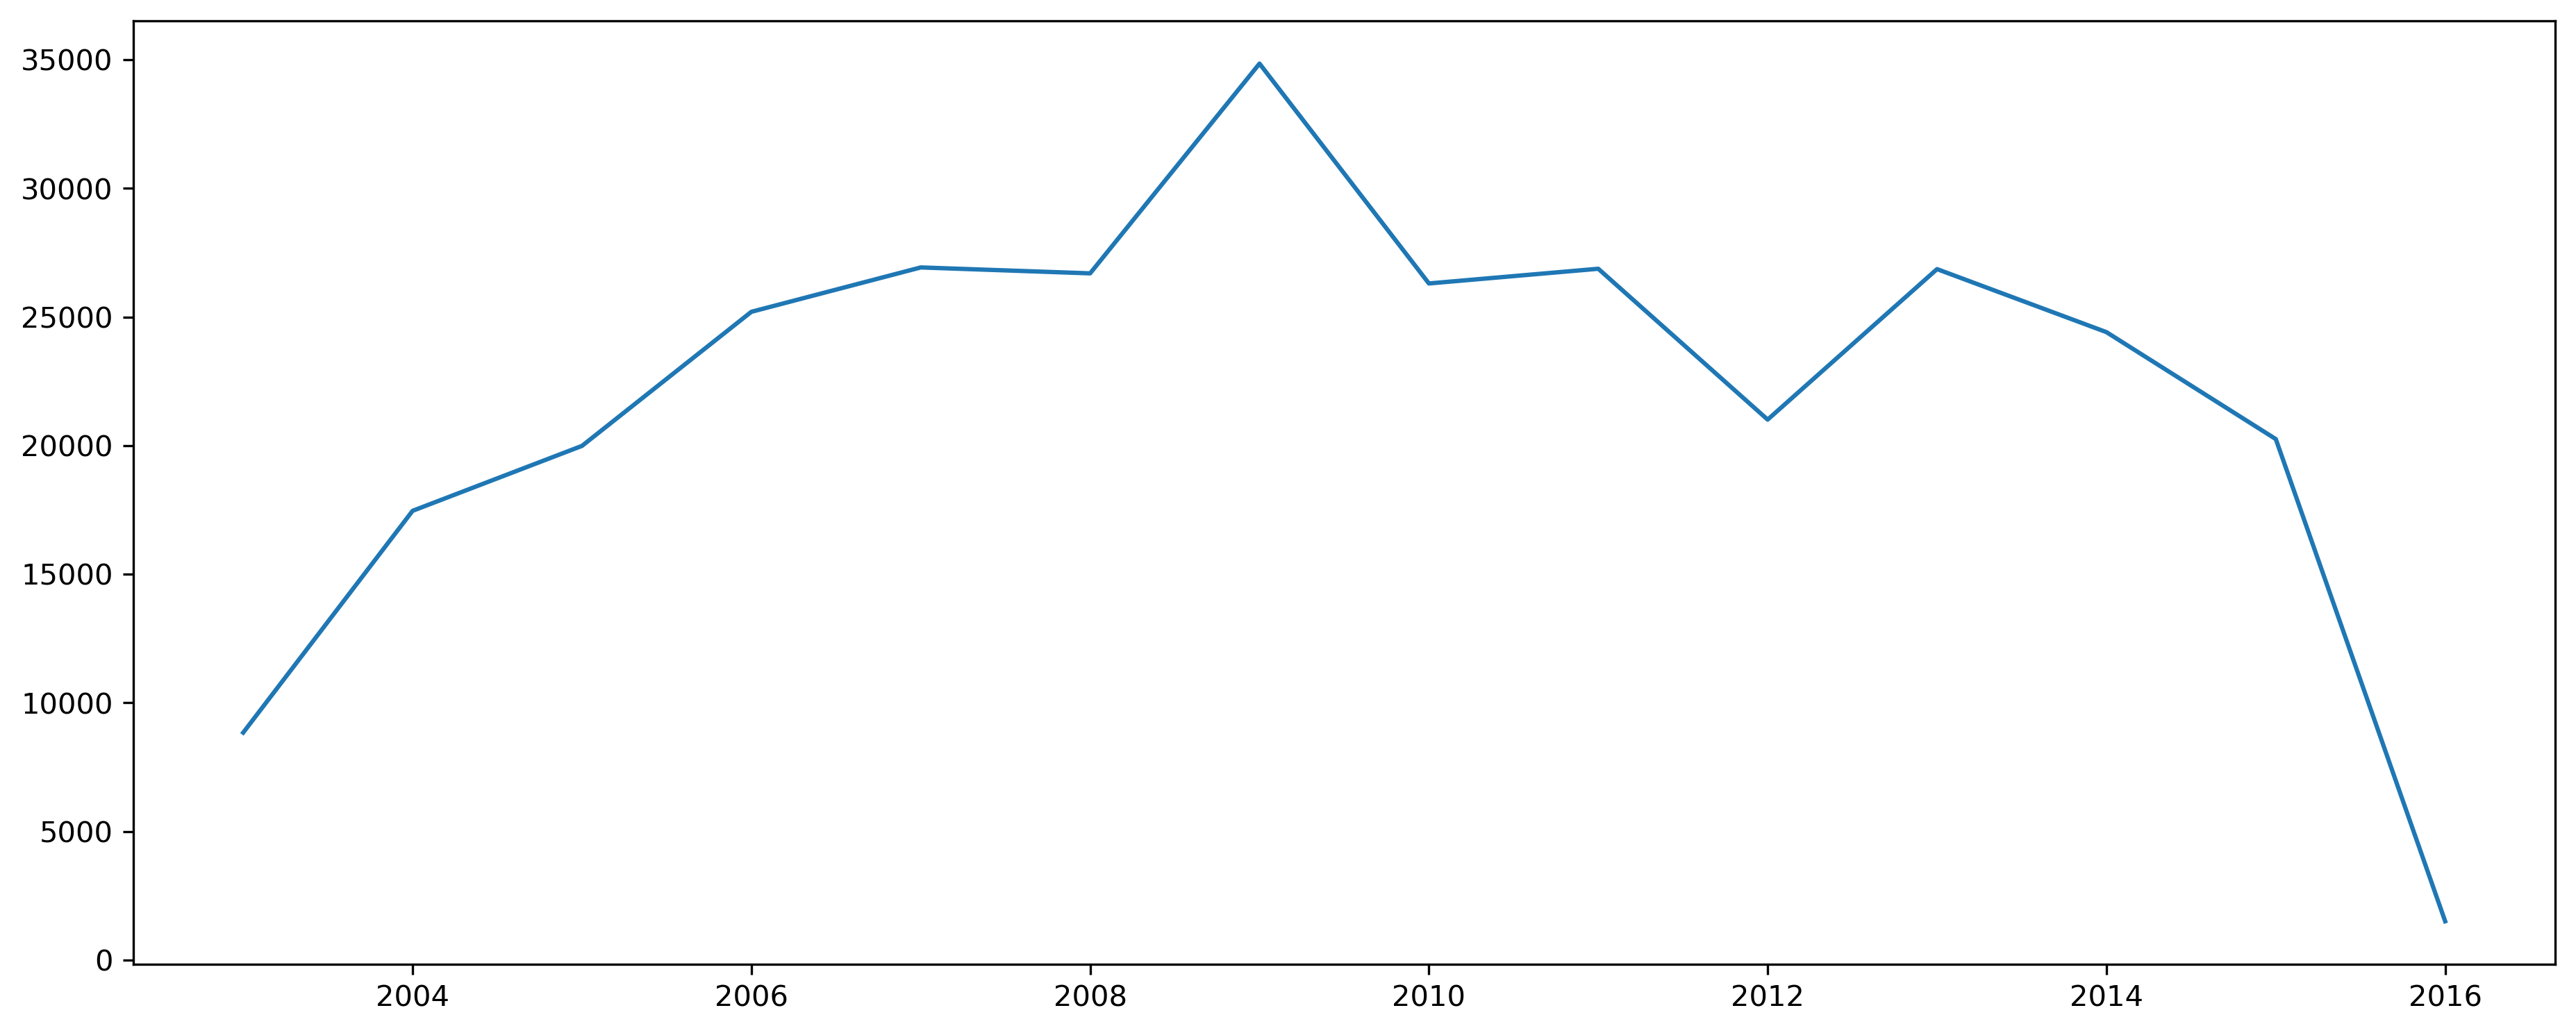

In [231]:
code = data[data.DelaysLateAircraft == data.DelaysLateAircraft.max()].iloc[0].Code
evolution = data[data.Code == code].groupby('TimeYear',as_index=False).agg({'DelaysLateAircraft':'sum'})
plt.plot(list(evolution.TimeYear), list(evolution.DelaysLateAircraft))

### 3. Quel est l'aéroport ayant le plus haut pourcentage de vol décollant dans les temps?

In [76]:
percentage_data = data.groupby('Code', as_index=False).agg({'FlightsOnTime':'sum', 'FlightsTotal': 'sum'})
percentage_data['percentage'] = (percentage_data['FlightsOnTime'] / percentage_data['FlightsTotal']) * 100
percentage_data = percentage_data[percentage_data.percentage == percentage_data.percentage.max()].iloc[0]
print("L'aéroport possédant le moins d'incident est: {} avec un pourcentage de départ à l'heure de {}%".format(percentage_data.Code, round(percentage_data.percentage,2)))

L'aéroport possédant le moins d'incident est: SLC avec un pourcentage de départ à l'heure de 84.25%


https://corgis-edu.github.io/corgis/csv/airlines/

#### Histogramme du pourcentage de départ à l'heure par aéroport

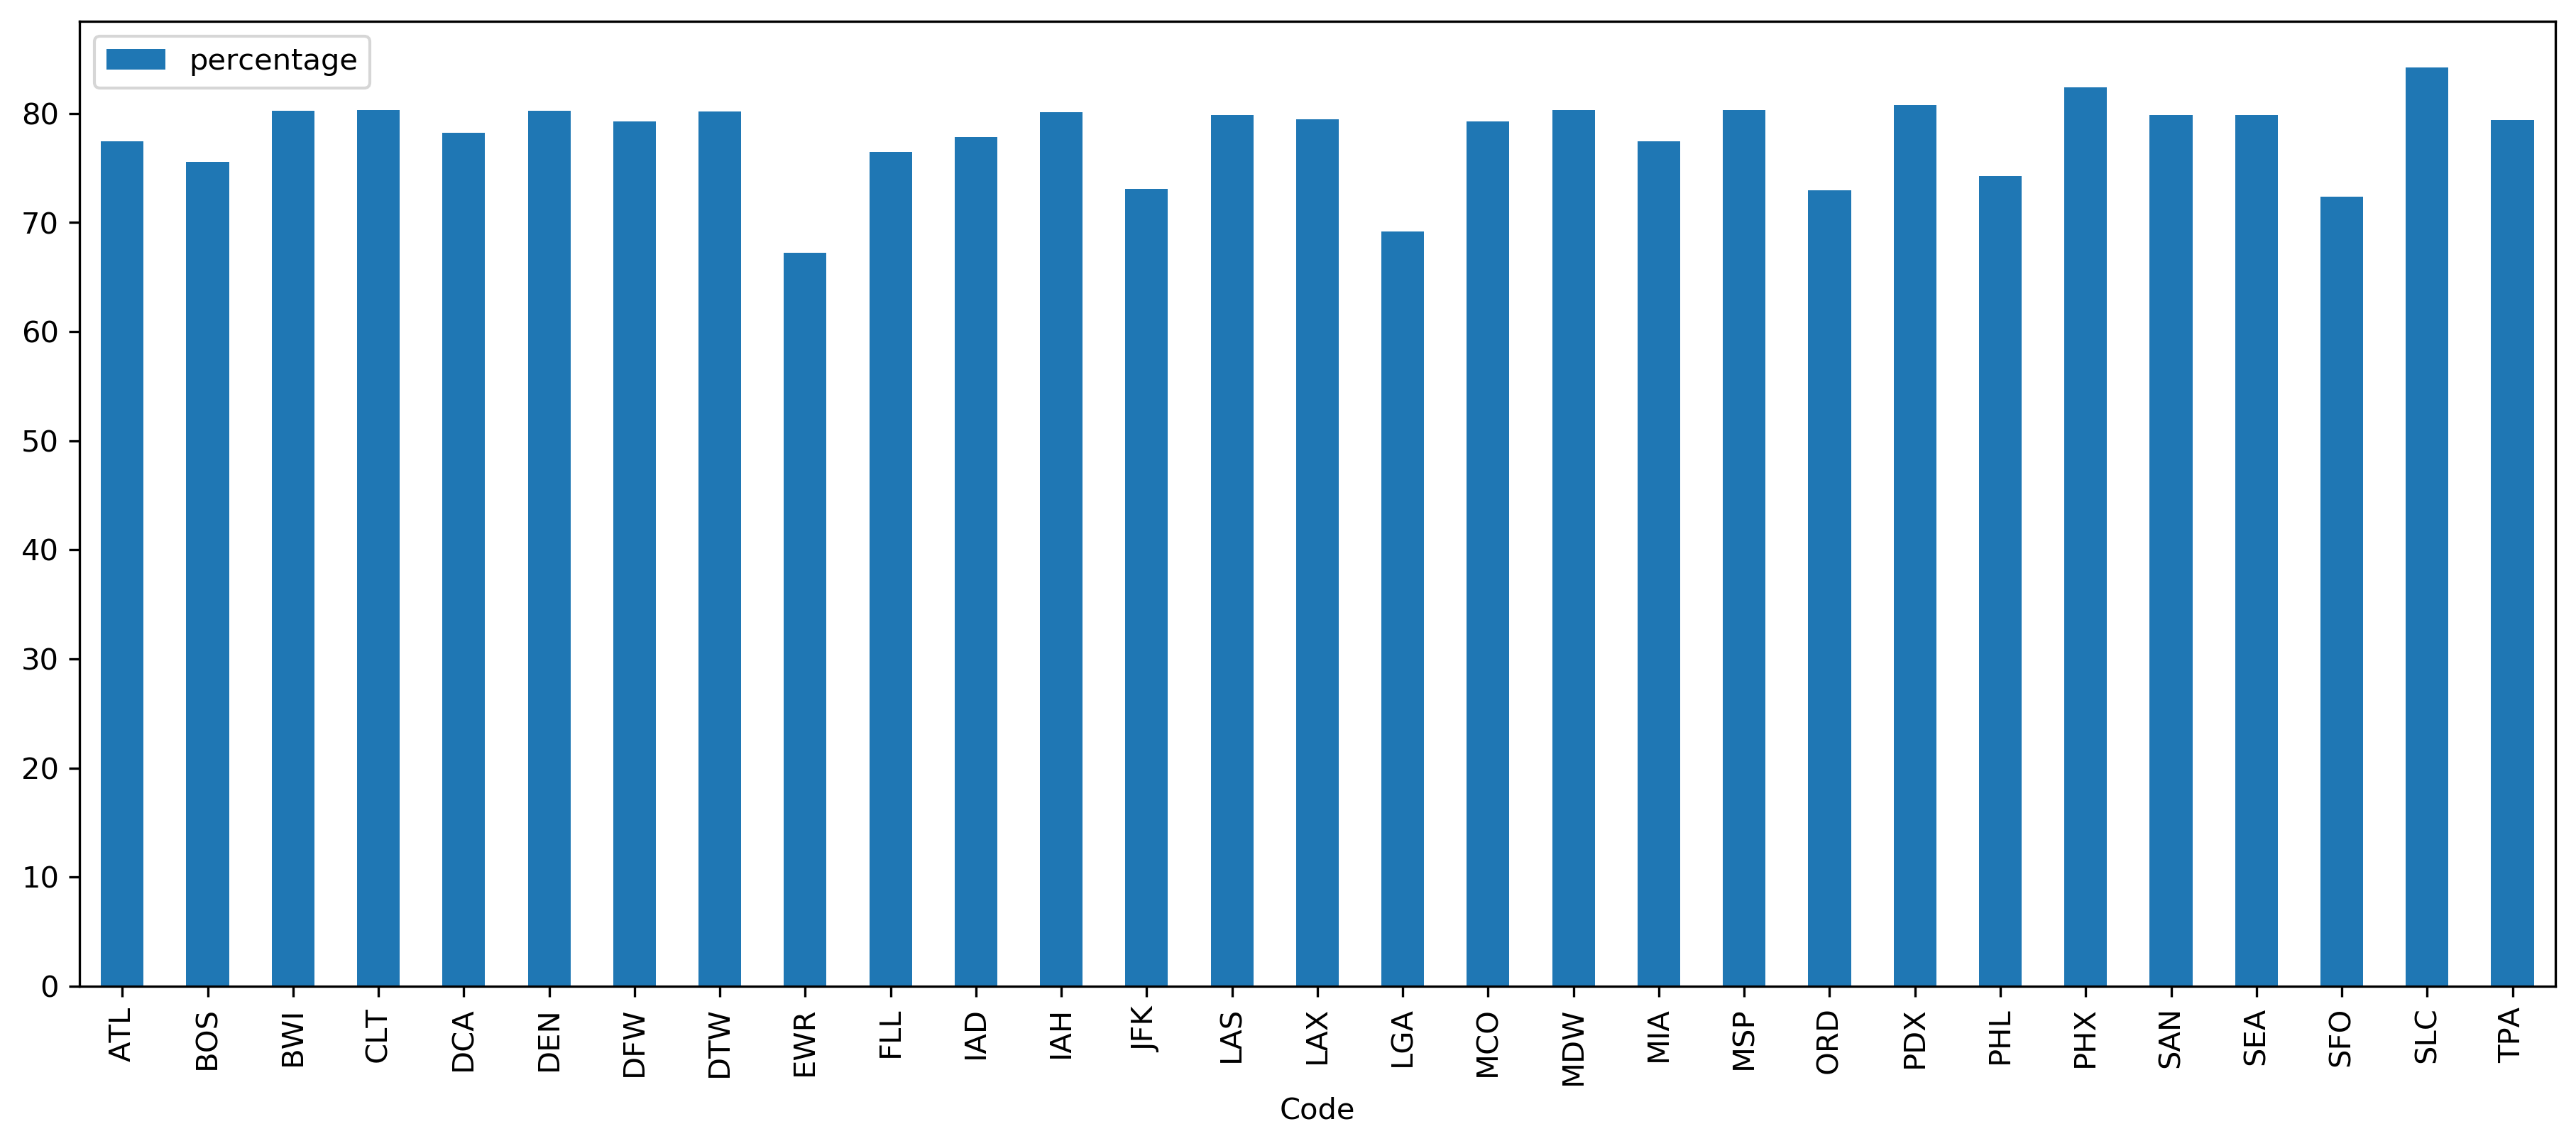

In [213]:
sum_data.plot(kind='bar',x='Code',y='percentage')

### 4. Quels sont les 3 mois les plus influants pour l'aéroport ayant le plus de retards météorologiques?

In [156]:
AirportWeatherCode = data.groupby('Code', as_index=False).agg({'MinutesDelayedWeather': 'sum'})
AirportWeatherCode = AirportWeatherCode[AirportWeatherCode.MinutesDelayedWeather == AirportWeatherCode.MinutesDelayedWeather.max()].iloc[0].Code
Months = data[data.Code == AirportWeatherCode].groupby('TimeMonth', as_index=False).agg({'MinutesDelayedWeather': 'sum'})
Months = Months.sort_values(by='MinutesDelayedWeather',ascending=False).head(3)
strMonth = ['Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Août','Septembre','Octobre','Novembre','Décembre']
monthsImportant = [strMonth[m-1] for m in list(Months.TimeMonth)]
print("Les trois mois causant le plus de retard météorologique sont: "+str(monthsImportant))

Les trois mois causant le plus de retard météorologique sont: ['Juillet', 'Juin', 'Février']


#### Somme des retards météorologiques groupés par mois

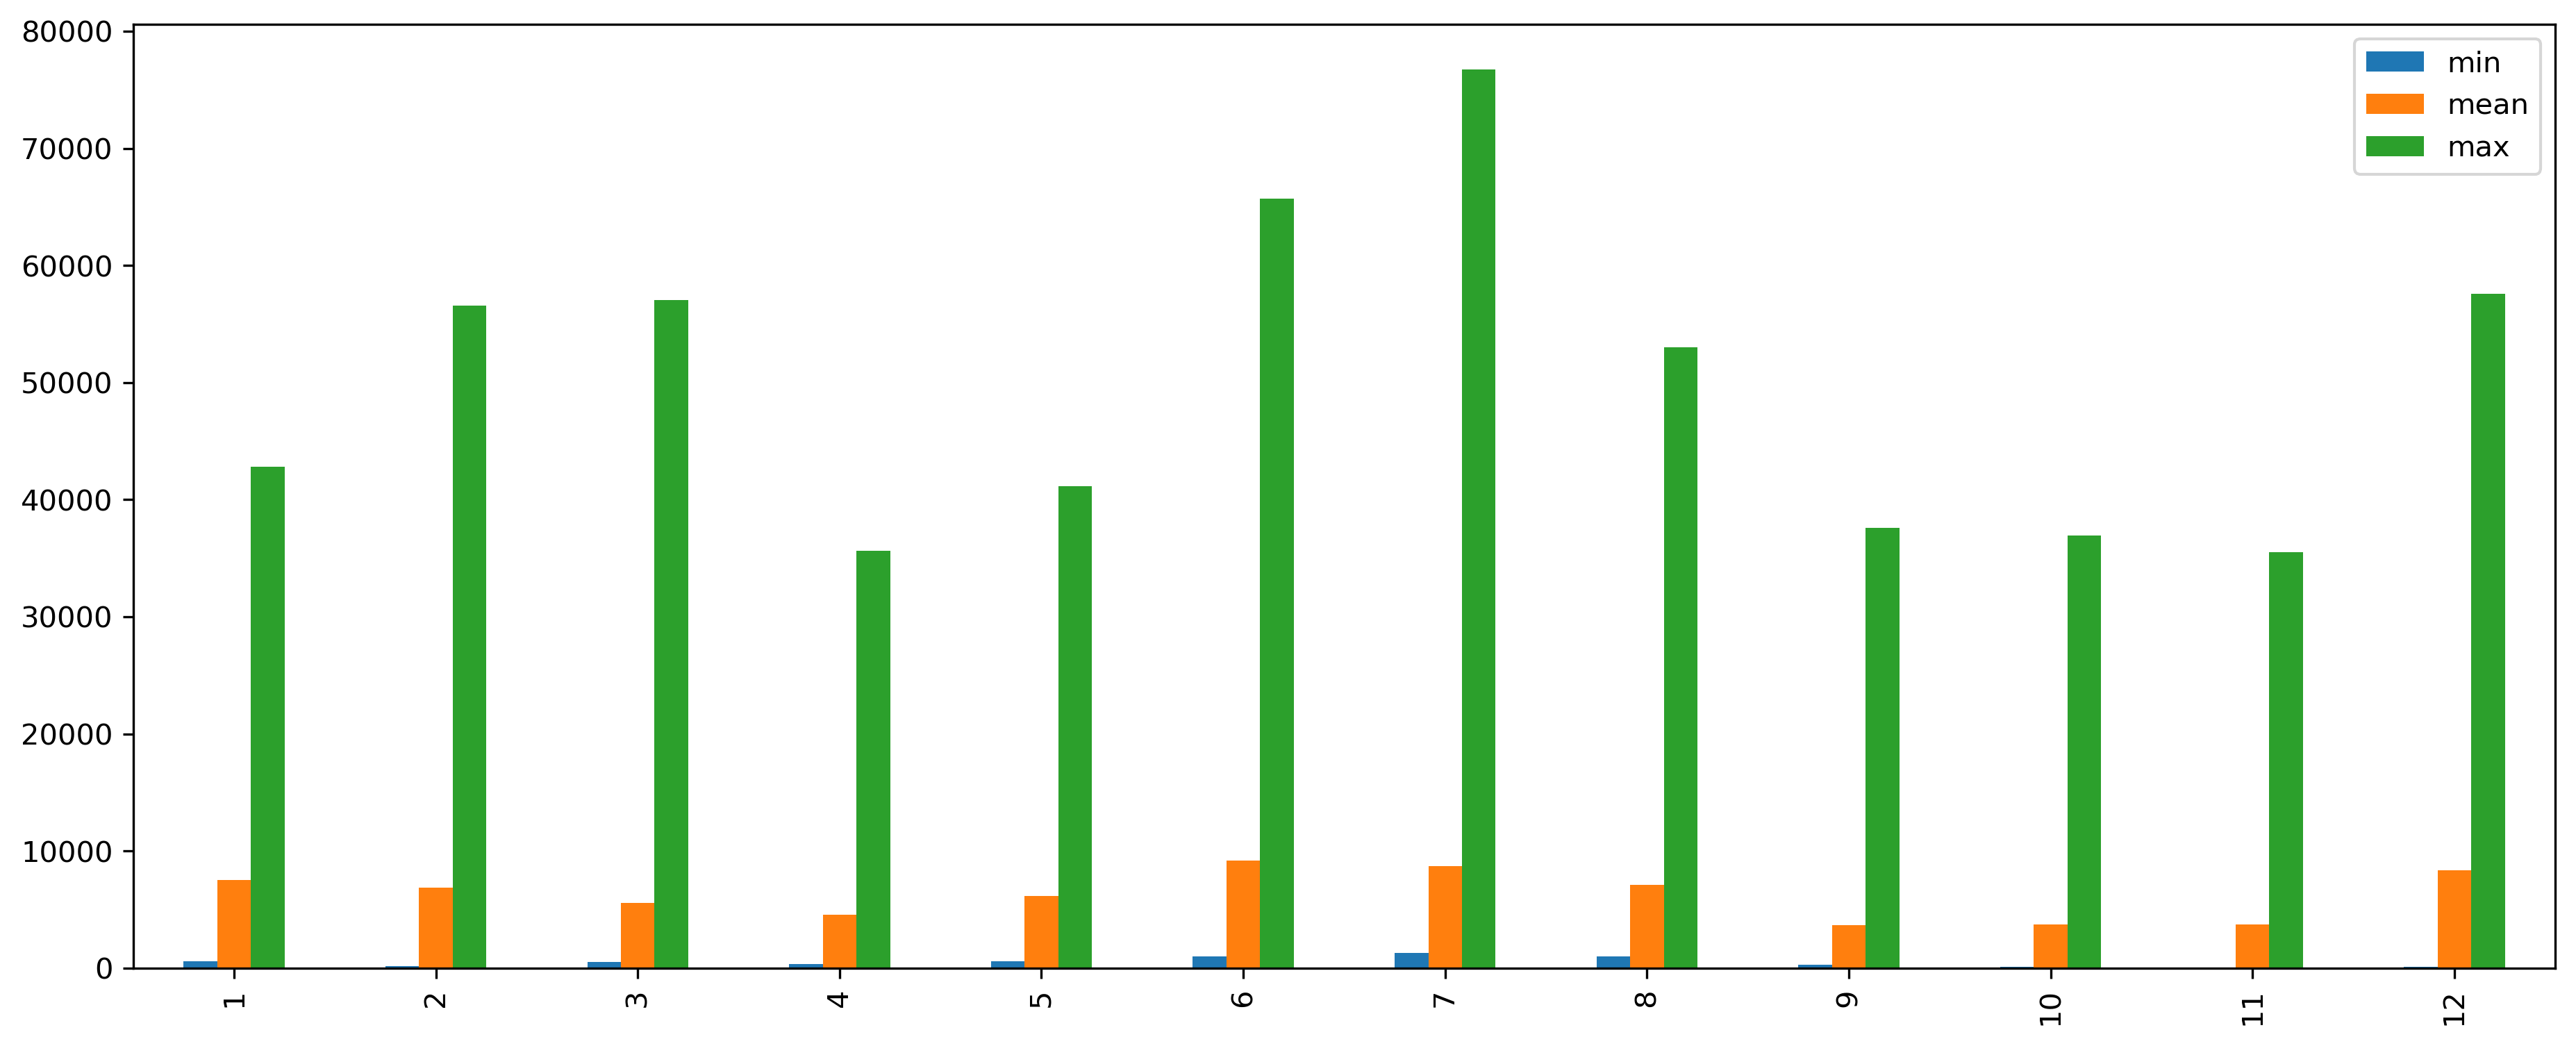

In [199]:
minMinutesDelayed = data.groupby('TimeMonth', as_index=False).agg({'MinutesDelayedWeather': 'min'})
avgMinutesDelayed = data.groupby('TimeMonth', as_index=False).agg({'MinutesDelayedWeather': 'mean'})
maxMinutesDelayed = data.groupby('TimeMonth', as_index=False).agg({'MinutesDelayedWeather': 'max'})

plotdata = pd.DataFrame({
    "min": list(minMinutesDelayed.MinutesDelayedWeather),
    "mean": list(avgMinutesDelayed.MinutesDelayedWeather),
    "max": list(maxMinutesDelayed.MinutesDelayedWeather)
}, index=list(minMinutesDelayed.TimeMonth))

plotdata.plot(kind="bar")

### 5. Quel sont les aéroports ayant plus grand nombre de annulation de vols?

In [212]:
cancelledFlight = data.groupby('Code', as_index=False).agg({'FlightsCancelled':'sum','FlightsTotal':'sum'})
cancelledFlight['cancelledPercentage'] = round((cancelledFlight['FlightsCancelled'] / cancelledFlight['FlightsTotal']) * 100, 2)
cancelledFlight.sort_values(by='cancelledPercentage',ascending=False).head(3)

,Code,FlightsCancelled,FlightsTotal,cancelledPercentage
15,LGA,57642,1416548,4.07
20,ORD,144426,4209590,3.43
8,EWR,54880,1670555,3.29


#### Pourcentage de vols annulés par aéroport

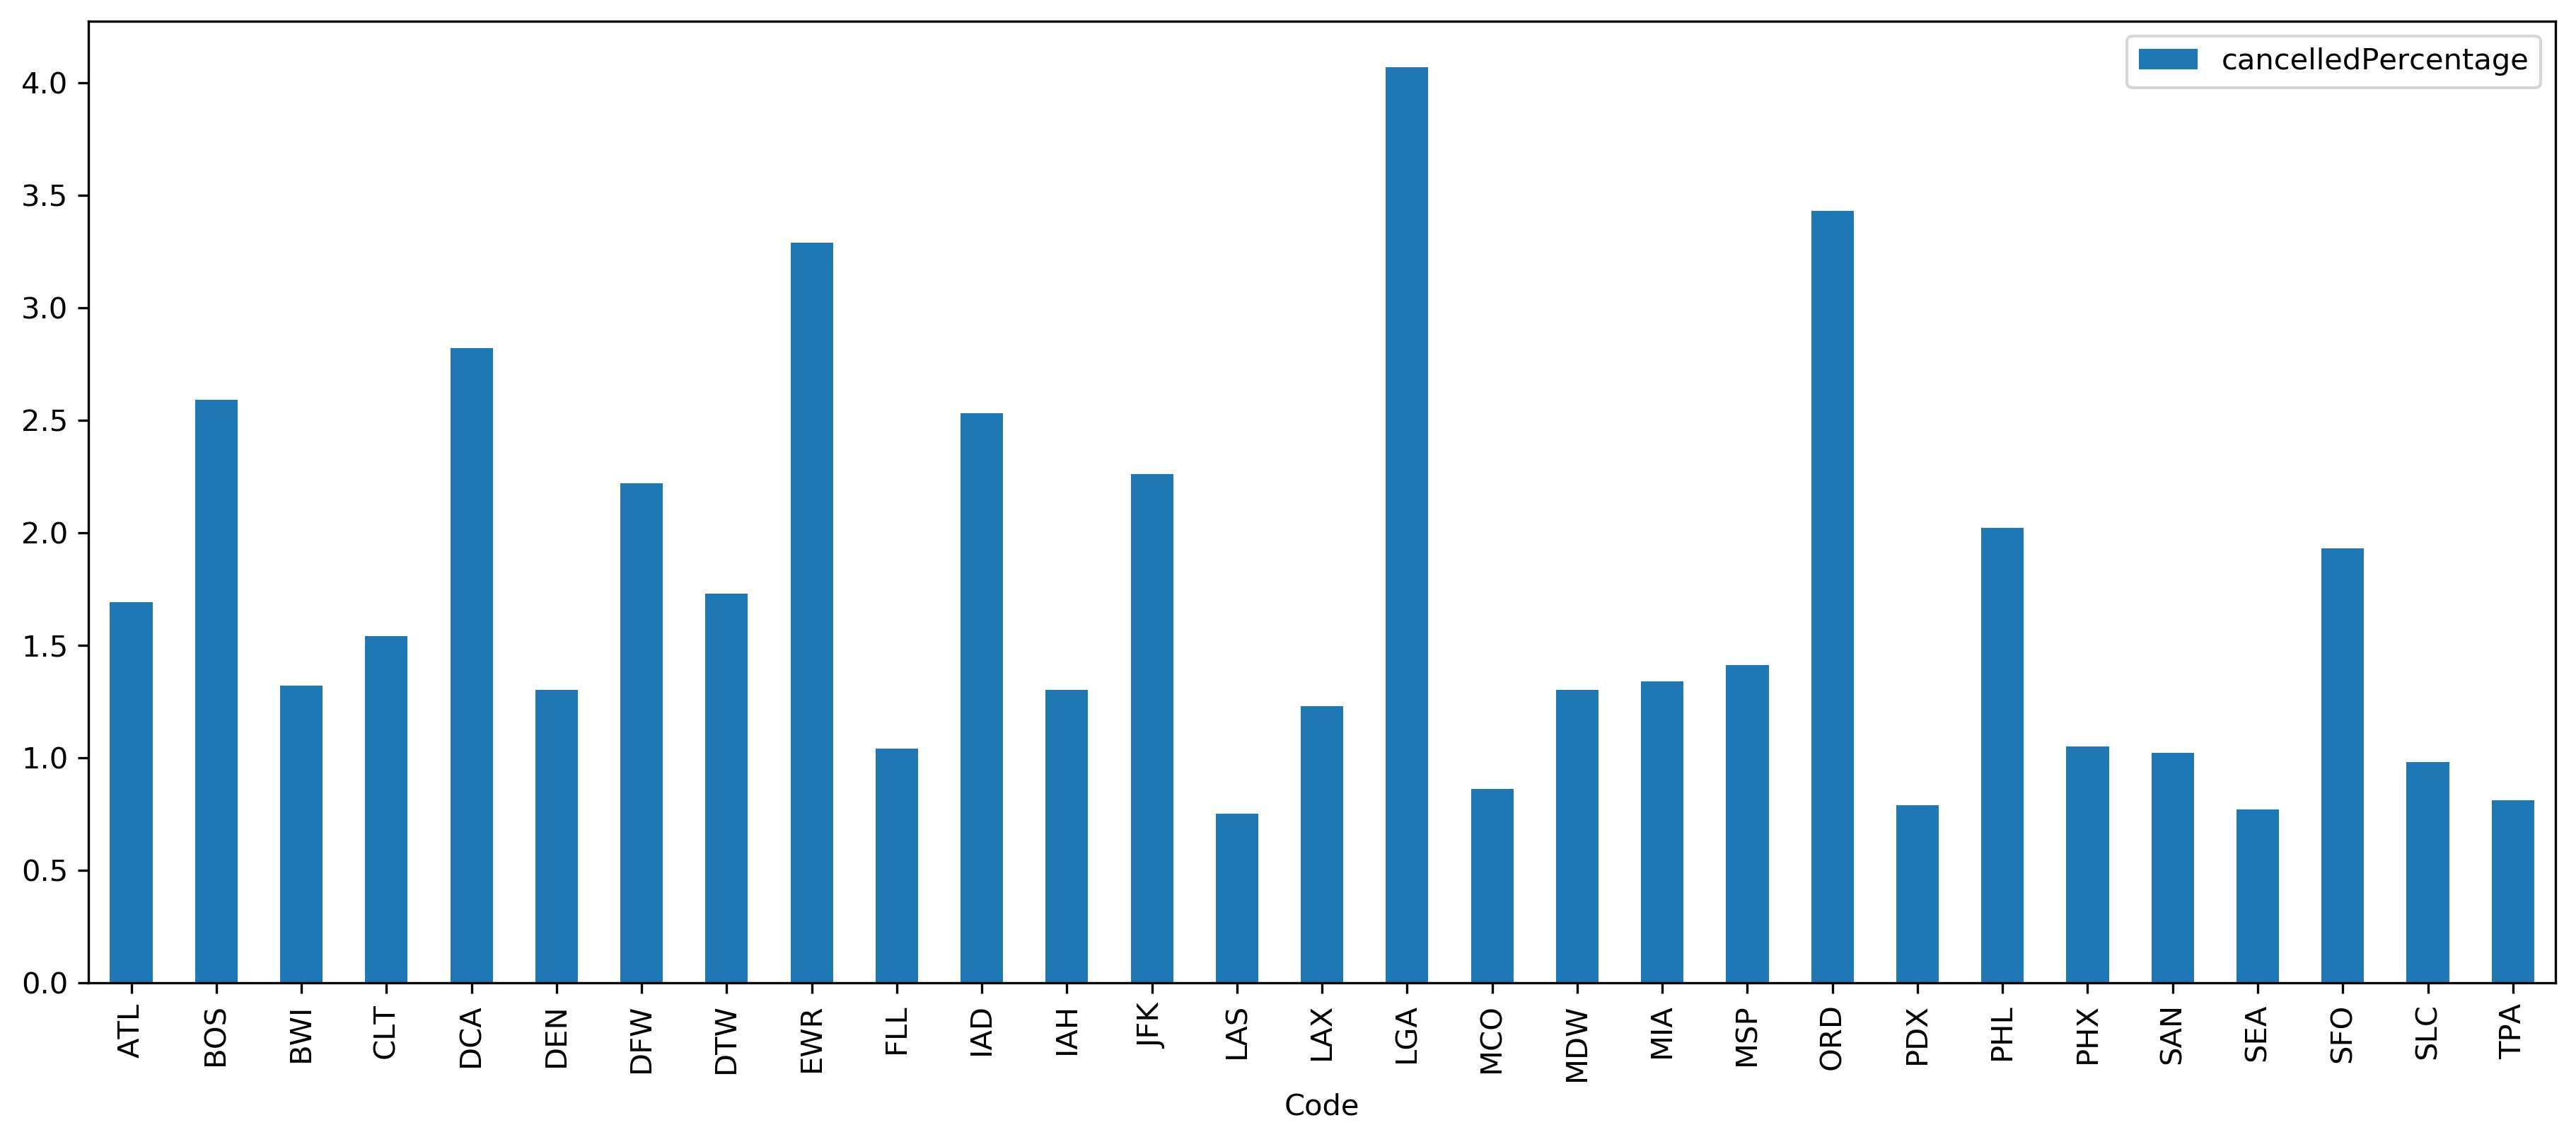

In [218]:
cancelledFlight.plot(kind='bar',x='Code',y='cancelledPercentage')